## Dựng video bằng OpenCV

Trong khi xây dựng ứng dụng, việc lưu video demo về công việc của bạn trở nên quan trọng cũng như nhiều ứng dụng có thể yêu cầu lưu một đoạn video clip. Ví dụ, trong một ứng dụng giám sát, bạn có thể phải lưu một đoạn video clip ngay khi bạn thấy điều gì đó bất thường xảy ra.

Sổ tay này sẽ mô tả cách lưu video ở định dạng **avi** và **mp4** bằng openCV.

In [14]:
import os
import cv2
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import YouTubeVideo, display, HTML
from base64 import b64encode

%matplotlib inline

In [15]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Tải xuống tệp zip bằng gói urllib.
    urlretrieve(url, save_path)

    try:
        #  Giải nén file zip bằng gói zipfile.
        with ZipFile(save_path) as z:
            # Giải nén nội dung tệp ZIP vào cùng thư mục.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [16]:
URL = r"https://www.dropbox.com/s/p8h7ckeo2dn1jtz/opencv_bootcamp_assets_NB6.zip?dl=1"

video_folder = os.path.join(os.getcwd(), "video")
os.makedirs(video_folder, exist_ok=True)
asset_zip_path = os.path.join(video_folder, "opencv_bootcamp_assets_NB6.zip")

# Tải xuống nếu tệp ZIP không tồn tại. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)   

## Đọc Video từ Nguồn

In [17]:
source = 'video/race_car.mp4'  # source = 0 for webcam

cap = cv2.VideoCapture(source)

In [18]:
if not cap.isOpened():
    print("Error opening video stream or file")

### Đọc và hiển thị một khung hình

In [19]:
ret, frame = cap.read()

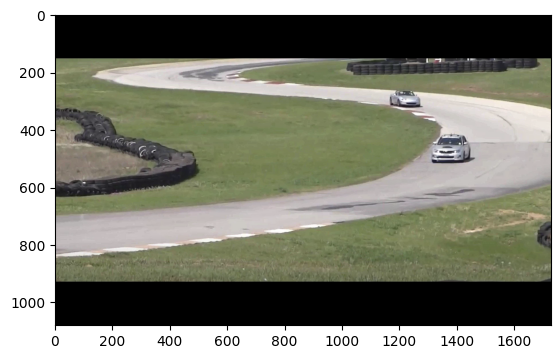

In [20]:
plt.imshow(frame[..., ::-1])

### Hiển thị tệp video

In [21]:
# video = YouTubeVideo("RwxVEjv78LQ", width=700, height=438)
# display(video)

## Tạo Video bằng OpenCV
Để viết video, bạn cần tạo một đối tượng videowriter với các tham số phù hợp.

### Cú pháp hàm

```python
Đối tượng VideoWriter = cv.VideoWriter(filename, fourcc, fps, frameSize)
```
trong đó,
**Tham số**

1. `filename`: Tên của tệp video đầu ra.

2. `fourcc`: Mã codec gồm 4 ký tự được sử dụng để nén các khung hình. Ví dụ, `VideoWriter::fourcc('P','I','M','1')` là codec MPEG-1, VideoWriter::fourcc('M','J','P','G') là codec motion-jpeg, v.v. Danh sách các mã có thể được tìm thấy tại trang Codecs by FOURCC. FFMPEG backend với bộ chứa MP4 sử dụng các giá trị khác làm mã fourcc: xem ObjectType, do đó bạn có thể nhận được thông báo cảnh báo từ OpenCV về chuyển đổi mã fourcc.

3. `fps`: Tốc độ khung hình của luồng video đã tạo.

4. `frameSize`: Kích thước của các khung video.

In [22]:
# Độ phân giải mặc định của khung hình được lấy.
# Chuyển đổi độ phân giải từ float sang số nguyên.
frame_width  = int(cap.get(3))
frame_height = int(cap.get(4))

# Xác định codec và tạo đối tượng VideoWriter.
out_avi = cv2.VideoWriter("video/race_car_out.avi", cv2.VideoWriter_fourcc("M", "J", "P", "G"), 10, (frame_width, frame_height))

out_mp4 = cv2.VideoWriter("video/race_car_out.mp4", cv2.VideoWriter_fourcc(*"XVID"), 10, (frame_width, frame_height))

### Đọc khung và ghi vào tệp
Chúng ta sẽ đọc các khung từ video xe đua và ghi tương tự vào hai đối tượng chúng ta đã tạo ở bước trước. Chúng ta nên giải phóng các đối tượng sau khi nhiệm vụ hoàn tất.

In [23]:
# Đọc cho đến khi video hoàn tất
while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        # Ghi khung hình vào các tệp đầu ra
        out_avi.write(frame)
        out_mp4.write(frame)
    else:
        break

In [24]:
# Khi mọi thứ đã hoàn tất, hãy giải phóng các đối tượng VideoCapture và VideoWriter
cap.release()
out_avi.release()
out_mp4.release()

Để hiển thị video, chúng ta sẽ cài đặt và sử dụng gói `ffmpeg`. Sử dụng `ffmpeg`, chúng ta sẽ thay đổi mã hóa của tệp `.mp4` từ XVID thành H264

HTML 5 có thể hiển thị video đúng cách bằng mã hóa H264 và OpenCV vẫn chưa có mã hóa đó. Đó là lý do tại sao chúng ta cần thay đổi mã hóa của chúng để có thể hiển thị được.

Hiện tại, HTML5 chỉ hỗ trợ hiển thị tệp MP4, vì vậy chúng ta sẽ chỉ thay đổi mã hóa của tệp `race car out.mp4`.

In [28]:
# Thay đổi mã hóa video của tệp mp4 từ XVID sang h264
!ffmpeg -y -i "video/race_car_out.mp4" -c:v libx264 "video/race_car_out_x264.mp4"  -hide_banner -loglevel error

Kết xuất video MP4

In [29]:
mp4 = open("video/race_car_out_x264.mp4", "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML(f"""<video width=700 controls><source src="{data_url}" type="video/mp4"></video>""")

Video được hiển thị trong ô phía trên phải giống như video sau.

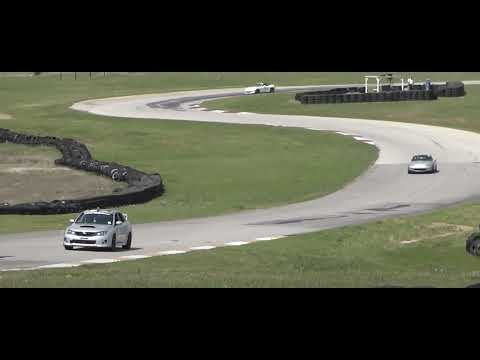

In [30]:
video = YouTubeVideo("2Gju7YLfkP0", width=700, height=438)
display(video)